<a href="https://colab.research.google.com/github/shounakd56/Image-Caption-Generation-using-Deep-Learning/blob/main/Week%202/WiDS_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Captioning using Deep Learning: Assignment-2

*  In this assignment, we will build a classifier for MNIST from using [PyTorch](https://pytorch.org/docs/stable/index.html). 

*   No limitations on your model this time, just don't use CNNs now, that's up next week.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Also remember to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time

## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [ ]:
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# Your Code from here...

In [ ]:
# load the data set

X =  torch.utils.data.DataLoader(train, batch_size=1000, shuffle=True)
y = torch.utils.data.DataLoader(test, batch_size=1000, shuffle=True)

# normalize the dataset, won't be doing it here in later assignments




In [ ]:
dataiter = iter(X)
images, labels = next(dataiter)


In [ ]:
# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.50, random_state=1, stratify=labels)


In [ ]:
labels

tensor([2, 0, 8, 7, 0, 8, 5, 1, 6, 9, 4, 2, 2, 6, 6, 1, 2, 1, 0, 5, 9, 2, 2, 4,
        2, 9, 0, 3, 8, 3, 2, 2, 2, 5, 6, 7, 5, 6, 7, 2, 8, 7, 8, 9, 0, 7, 2, 7,
        1, 5, 4, 9, 0, 2, 0, 3, 8, 8, 1, 7, 6, 2, 9, 7, 7, 5, 7, 0, 0, 0, 3, 8,
        9, 5, 6, 1, 0, 9, 7, 5, 4, 1, 1, 2, 9, 7, 7, 4, 9, 3, 2, 9, 7, 9, 3, 2,
        4, 9, 2, 1, 3, 1, 5, 3, 2, 2, 7, 8, 9, 9, 1, 1, 7, 8, 2, 4, 2, 1, 1, 3,
        8, 5, 4, 8, 2, 7, 8, 9, 8, 1, 5, 2, 3, 8, 2, 8, 2, 1, 0, 1, 8, 0, 4, 4,
        3, 6, 2, 1, 1, 7, 1, 9, 8, 2, 7, 9, 5, 2, 6, 1, 7, 3, 6, 0, 6, 1, 5, 4,
        8, 6, 3, 3, 9, 7, 9, 7, 7, 5, 7, 6, 7, 1, 3, 1, 8, 8, 0, 2, 7, 6, 3, 9,
        3, 8, 2, 9, 0, 2, 1, 6, 7, 8, 6, 0, 9, 3, 6, 8, 4, 1, 4, 5, 7, 3, 2, 0,
        1, 2, 8, 6, 3, 0, 5, 6, 9, 6, 7, 2, 0, 5, 0, 4, 1, 4, 1, 6, 6, 2, 2, 5,
        7, 1, 1, 4, 5, 6, 0, 8, 9, 1, 6, 7, 0, 5, 5, 4, 3, 3, 2, 3, 9, 4, 0, 1,
        1, 9, 7, 3, 6, 0, 5, 9, 0, 9, 7, 4, 2, 2, 6, 5, 7, 9, 4, 1, 2, 5, 0, 3,
        7, 1, 7, 6, 6, 3, 2, 2, 6, 7, 1,

In [ ]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels


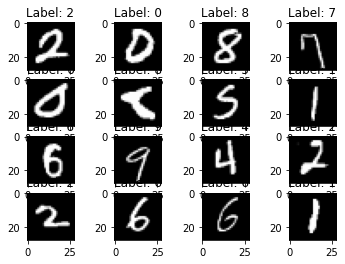

In [ ]:
for i in range(16):
     plt.subplot(4,4,i+1)
     plt.imshow(images[i][0], cmap='gray')
     plt.title('Label: {}'.format(labels[i]))
plt.show()

In [ ]:
# define your dataset for pre-processing into Neural Network






## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [```nn.ReLU```](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- [```nn.BatchNorm1d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)


In [ ]:
input_size=784
hidden_size=5000
num_classes=10
num_epochs=2

In [ ]:
# define a child class of nn.Module for your model
# specify the architecture here itself

class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
         super(NeuralNet, self).__init__()
         self.input_size = input_size
         self.l1 = nn.Linear(input_size, hidden_size) 
         self.relu = nn.ReLU()
         self.l2 = nn.Linear(hidden_size, num_classes)  
     def forward(self, x):
         out = self.l1(x)
         out = self.relu(out)
         out = self.l2(out)
         return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [ ]:
def train(model, optimizer, criterion, train_loader, display_step=None):
  for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        inputs = inputs.reshape(-1, 28*28).to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

  print('Finished Training')
    

In [ ]:
train(model,optimizer,criterion,X,display_step=None)

Finished Training


In [ ]:
y

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [ ]:
dataiter2 = iter(y)
images2, labels2 = next(dataiter2)
images3=images2.numpy()
images3 = images3.reshape(-1, 28*28)


In [ ]:
def predict(model, X_test):
    test_tensor = torch.from_numpy(X_test)
    preds=model(test_tensor)
    _,predicted = torch.max(preds.data, 1)
    return predicted


In [ ]:
predicted=predict(model,images3)

In [ ]:
predicted=predicted.numpy()

In [ ]:
predicted

array([5, 0, 1, 0, 0, 1, 5, 4, 1, 3, 1, 1, 6, 0, 2, 3, 9, 1, 3, 5, 3, 4,
       4, 0, 3, 1, 2, 2, 4, 4, 4, 8, 7, 6, 1, 8, 6, 1, 5, 6, 9, 2, 5, 0,
       2, 9, 3, 8, 6, 7, 3, 0, 0, 3, 7, 1, 0, 0, 0, 7, 3, 7, 7, 9, 0, 1,
       2, 3, 3, 3, 7, 0, 9, 6, 7, 4, 3, 1, 3, 6, 3, 1, 0, 9, 1, 1, 2, 0,
       6, 9, 3, 0, 7, 6, 4, 3, 3, 9, 1, 3, 1, 1, 1, 1, 7, 4, 2, 2, 2, 1,
       3, 8, 6, 1, 0, 8, 9, 5, 4, 2, 3, 3, 2, 9, 5, 7, 0, 7, 7, 0, 9, 0,
       6, 9, 9, 1, 9, 1, 2, 9, 8, 4, 1, 6, 7, 9, 6, 3, 2, 6, 0, 2, 9, 9,
       7, 0, 3, 7, 4, 0, 7, 4, 6, 3, 8, 9, 1, 3, 6, 0, 6, 1, 9, 0, 7, 2,
       8, 9, 1, 8, 7, 0, 0, 8, 0, 1, 8, 5, 6, 0, 7, 5, 6, 3, 3, 4, 7, 4,
       8, 9, 8, 9, 3, 2, 6, 7, 9, 6, 2, 6, 8, 0, 1, 1, 6, 8, 9, 8, 0, 4,
       8, 2, 8, 3, 6, 4, 4, 8, 7, 2, 7, 6, 4, 1, 0, 0, 2, 6, 2, 1, 4, 7,
       4, 3, 4, 6, 2, 9, 4, 9, 1, 1, 7, 0, 6, 3, 7, 7, 0, 2, 4, 6, 1, 4,
       8, 3, 2, 9, 9, 5, 2, 3, 7, 3, 4, 4, 4, 6, 9, 6, 1, 6, 2, 9, 7, 3,
       1, 3, 7, 4, 3, 6, 7, 9, 4, 6, 3, 1, 2, 1, 5,

In [ ]:
labels2=labels2.numpy()

In [ ]:
labels2

array([5, 2, 1, 0, 5, 1, 5, 4, 1, 8, 1, 1, 6, 0, 2, 3, 7, 1, 3, 5, 3, 9,
       4, 0, 5, 1, 7, 2, 4, 4, 4, 8, 7, 6, 1, 8, 6, 1, 5, 6, 9, 2, 5, 0,
       2, 9, 3, 8, 6, 7, 8, 5, 0, 3, 7, 1, 0, 0, 0, 7, 3, 7, 7, 4, 0, 1,
       2, 5, 5, 8, 7, 0, 9, 6, 7, 4, 3, 2, 3, 6, 5, 2, 0, 9, 1, 1, 5, 5,
       6, 9, 3, 0, 7, 6, 4, 3, 3, 9, 1, 3, 1, 1, 1, 7, 7, 4, 2, 2, 2, 1,
       3, 8, 6, 1, 0, 4, 9, 5, 4, 2, 5, 3, 2, 4, 5, 7, 0, 7, 7, 0, 4, 0,
       6, 9, 9, 1, 9, 1, 2, 9, 8, 4, 1, 9, 7, 9, 6, 3, 8, 6, 5, 2, 9, 9,
       7, 0, 3, 7, 9, 0, 7, 4, 6, 3, 8, 9, 1, 3, 6, 0, 5, 6, 9, 0, 8, 2,
       8, 9, 1, 8, 7, 0, 0, 8, 0, 1, 8, 5, 6, 0, 7, 5, 6, 3, 3, 4, 7, 4,
       8, 9, 5, 9, 3, 2, 6, 7, 9, 6, 2, 6, 8, 0, 1, 1, 0, 8, 4, 0, 0, 4,
       8, 2, 7, 3, 6, 4, 4, 8, 7, 1, 7, 6, 4, 1, 0, 0, 2, 6, 2, 1, 4, 9,
       4, 5, 4, 6, 2, 4, 4, 9, 1, 1, 7, 0, 6, 3, 7, 9, 0, 7, 4, 6, 7, 4,
       8, 3, 8, 9, 8, 5, 2, 3, 9, 8, 4, 4, 4, 6, 9, 6, 1, 6, 3, 9, 7, 3,
       1, 3, 7, 4, 3, 6, 9, 9, 4, 6, 3, 1, 2, 1, 5,

In [ ]:
def accuracy(pred, labels):
  acc=np.sum(np.equal(pred,labels))/len(labels)
  print(acc)

In [ ]:
accuracy(predicted,labels2)

0.787


## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [ ]:
X_test_arr=X_test.numpy().reshape(-1, 28*28)
p_val=predict(model,X_test_arr)

In [ ]:
p_val=p_val.numpy()
p_val

array([7, 7, 1, 0, 2, 3, 7, 9, 6, 4, 7, 7, 0, 0, 1, 3, 6, 7, 2, 2, 0, 6,
       6, 1, 9, 2, 1, 8, 8, 0, 9, 3, 3, 6, 9, 7, 3, 7, 4, 4, 7, 0, 1, 9,
       3, 2, 0, 1, 7, 5, 8, 1, 1, 2, 0, 4, 8, 7, 3, 2, 3, 4, 3, 9, 6, 9,
       8, 9, 2, 8, 4, 9, 8, 1, 1, 7, 0, 6, 6, 7, 8, 0, 9, 1, 3, 9, 7, 3,
       9, 1, 6, 3, 0, 6, 7, 8, 9, 0, 0, 2, 2, 2, 3, 0, 4, 8, 0, 9, 4, 9,
       4, 0, 8, 3, 7, 4, 3, 0, 1, 8, 3, 7, 9, 0, 1, 2, 1, 3, 7, 8, 3, 7,
       8, 1, 7, 1, 7, 4, 3, 6, 7, 4, 9, 0, 8, 1, 3, 7, 7, 9, 4, 3, 2, 3,
       4, 9, 6, 6, 9, 3, 3, 9, 2, 5, 2, 3, 8, 4, 2, 7, 4, 8, 2, 1, 0, 7,
       2, 0, 2, 6, 3, 1, 4, 3, 3, 6, 0, 4, 7, 7, 2, 8, 1, 6, 5, 0, 1, 7,
       5, 0, 1, 4, 0, 3, 0, 0, 8, 9, 1, 3, 6, 1, 0, 1, 9, 9, 4, 4, 7, 9,
       2, 2, 0, 6, 2, 4, 6, 6, 0, 6, 2, 4, 2, 0, 7, 7, 6, 2, 2, 0, 0, 1,
       6, 2, 4, 9, 0, 0, 3, 9, 3, 9, 3, 6, 9, 5, 2, 6, 3, 1, 6, 8, 1, 1,
       3, 3, 2, 7, 5, 9, 1, 4, 1, 3, 0, 2, 1, 7, 2, 4, 7, 3, 1, 9, 1, 3,
       6, 0, 2, 0, 0, 6, 1, 7, 4, 8, 8, 0, 7, 1, 3,

In [ ]:
y_test_arr=y_test.numpy()

In [ ]:
accuracy(p_val,y_test_arr)

0.794


## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_2.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_2.pt``` model-weights file to the repository.

In [ ]:
from google.colab import files
torch.save(model, 'ass_2.pt')
files.download('ass_2.pt') # download the file from the Colab session for submission

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Check if it got saved right!

In [ ]:
# load the model, use predict function
